In [24]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import ast

# Load data
rf = pd.read_csv("/Users/arsenpankiv/Desktop/Python_practice/small_dataset.csv")

# Clean data
rf["date"] = pd.to_datetime(rf["date"])
rf["skills_list"] = rf["skills_list"].apply(
    lambda skills: ast.literal_eval(skills) if isinstance(skills, str) else skills
)

# create a copy and remove rows with missing values
ng_frame = rf.copy()
stat = ng_frame[ng_frame["job_title"] == "Statistician"]
stat = stat.dropna(subset="mean_salary")





In [ ]:
stat_exploded = stat.explode("skills_list")
pivoted = stat_exploded.pivot_table(index="skills_list", values="mean_salary", aggfunc=["count", "median"])
pivoted
print(pivoted.columns)
pivoted_salary_sorted = pivoted.sort_values(by=('median', 'mean_salary'), ascending=False)
# let's now do the same but this time let's sort it by count 
pivoted_count_sorted = pivoted.sort_values(by=('count', 'mean_salary'), ascending=False)


MultiIndex([( 'count', 'mean_salary'),
            ('median', 'mean_salary')],
           )


,count,median
,mean_salary,mean_salary
skills_list,,
Probability,4,21386.0
Regression,4,21386.0
SAS,4,21386.0
Data Analysis,3,21314.0
Python,3,21314.0
R,3,21314.0
Data Cleaning,1,20911.0
Machine Learning,1,20911.0


/var/folders/yw/g9rc194541g7r9n119w4bljr0000gn/T/ipykernel_22449/3240763859.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pivoted_salary_sorted , x=pivoted_salary_sorted[('median', 'mean_salary')], y=pivoted_salary_sorted.index, ax=ax[0], palette="dark:salmon_r")
/var/folders/yw/g9rc194541g7r9n119w4bljr0000gn/T/ipykernel_22449/3240763859.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pivoted_count_sorted,x=pivoted_count_sorted[('count', 'mean_salary')], y=pivoted_count_sorted.index, ax=ax[1],palette="light:pink")


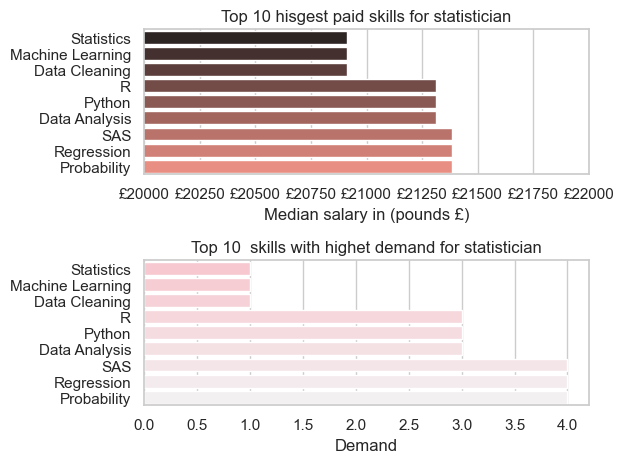

In [44]:
import seaborn as sns 

fig, ax = plt.subplots(2, 1)
sns.set_theme(style="whitegrid")

sns.barplot(data=pivoted_salary_sorted , x=pivoted_salary_sorted[('median', 'mean_salary')], y=pivoted_salary_sorted.index, ax=ax[0], palette="dark:salmon_r")

ax[0].invert_yaxis()
ax[0].set_xlim(20000,22000)
ax[0].set_title("Top 10 hisgest paid skills for statistician")
ax[0].set_ylabel("")
ax[0].set_xlabel("Median salary in (pounds £)")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, posi: f"£{x:.0f}" ))
sns.barplot(data=pivoted_count_sorted,x=pivoted_count_sorted[('count', 'mean_salary')], y=pivoted_count_sorted.index, ax=ax[1],palette="light:pink")
ax[1].set_title("Top 10  skills with highet demand for statistician")
ax[1].set_xlabel("Demand")
ax[1].set_ylabel("")
ax[1].invert_yaxis()


fig.tight_layout() #to overcome overlapping 